In [1]:
import tensorflow as tf
import pandas as pd

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
blackfriday=pd.read_csv('/Users/deepyuan/Desktop/data_kaggle/BlackFriday.csv') 

In [3]:
print(blackfriday['Product_Category_1'].unique())
blackfriday.head()

[ 3  1 12  8  5  4  2  6 14 11 13 15  7 16 18 10 17  9]


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
from sklearn.model_selection import train_test_split

In [5]:
blackfriday['Gender_N']=blackfriday.Gender.map({'F':0,'M':1})
blackfriday['Age_N']=blackfriday.Age.map({'0-17':0,'18-25':1,'26-35':2,'36-45':3,'46-50':4,'51-55':5,'55+':6})
blackfriday['City_Category_N']=blackfriday.City_Category.map({'A':0,'B':1,'C':2})
blackfriday['Stay_In_Current_City_Years_N']=blackfriday.Stay_In_Current_City_Years.map({'0':0,'1':1,'2':2,'3':3,'4+':4})
blackfriday.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender_N,Age_N,City_Category_N,Stay_In_Current_City_Years_N
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370,0,0,0,2
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200,0,0,0,2
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422,0,0,0,2
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057,0,0,0,2
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969,1,6,2,4


In [6]:
X=blackfriday.iloc[:,[4,7,11,12,13,14,15]]
Y=blackfriday.iloc[:, 8]
X_train,X_test,y_train,y_test=train_test_split(X,Y, test_size=0.1, random_state=100)
y_train=y_train.values.reshape(-1,1)
print(X_train.shape)
print(y_train.shape)

(483819, 7)
(483819, 1)


In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense,  Flatten
from tensorflow.python.keras.utils  import to_categorical
from tensorflow.python.keras.optimizers import SGD
from tensorflow.python.keras.callbacks import TensorBoard
model=Sequential()
model.add(Flatten())
model.add(Dense(64, activation='relu', input_shape=(48,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(19, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
tensor_board = TensorBoard(log_dir='./Graph', histogram_freq=0, write_graph=True, write_images=True)

In [9]:
#with tf.Session() as sess:
#     black_friday = tf.summary.FileWriter("Graph", sess.graph)
model.compile(loss='sparse_categorical_crossentropy',optimizer=sgd, metrics=['accuracy'])
model.fit(X_train, y_train, epochs=50, batch_size=1500, verbose=1,callbacks=[tensor_board])

Epoch 1/50
483819/483819 [==============================] - 2s 3us/step - loss: 1.7571 - acc: 0.4679
Epoch 2/50
483819/483819 [==============================] - 1s 3us/step - loss: 1.4621 - acc: 0.4971
Epoch 3/50
483819/483819 [==============================] - 1s 3us/step - loss: 1.3996 - acc: 0.5128
Epoch 4/50
483819/483819 [==============================] - 1s 3us/step - loss: 1.3737 - acc: 0.5186
Epoch 5/50
483819/483819 [==============================] - 1s 3us/step - loss: 1.3590 - acc: 0.5213
Epoch 6/50
483819/483819 [==============================] - 1s 3us/step - loss: 1.3481 - acc: 0.5219
Epoch 7/50
483819/483819 [==============================] - 1s 3us/step - loss: 1.3390 - acc: 0.5222
Epoch 8/50
483819/483819 [==============================] - 1s 3us/step - loss: 1.3308 - acc: 0.5207
Epoch 9/50
483819/483819 [==============================] - 2s 4us/step - loss: 1.3226 - acc: 0.5191
Epoch 10/50
483819/483819 [==============================] - 2s 3us/step - loss: 1.3134 - a

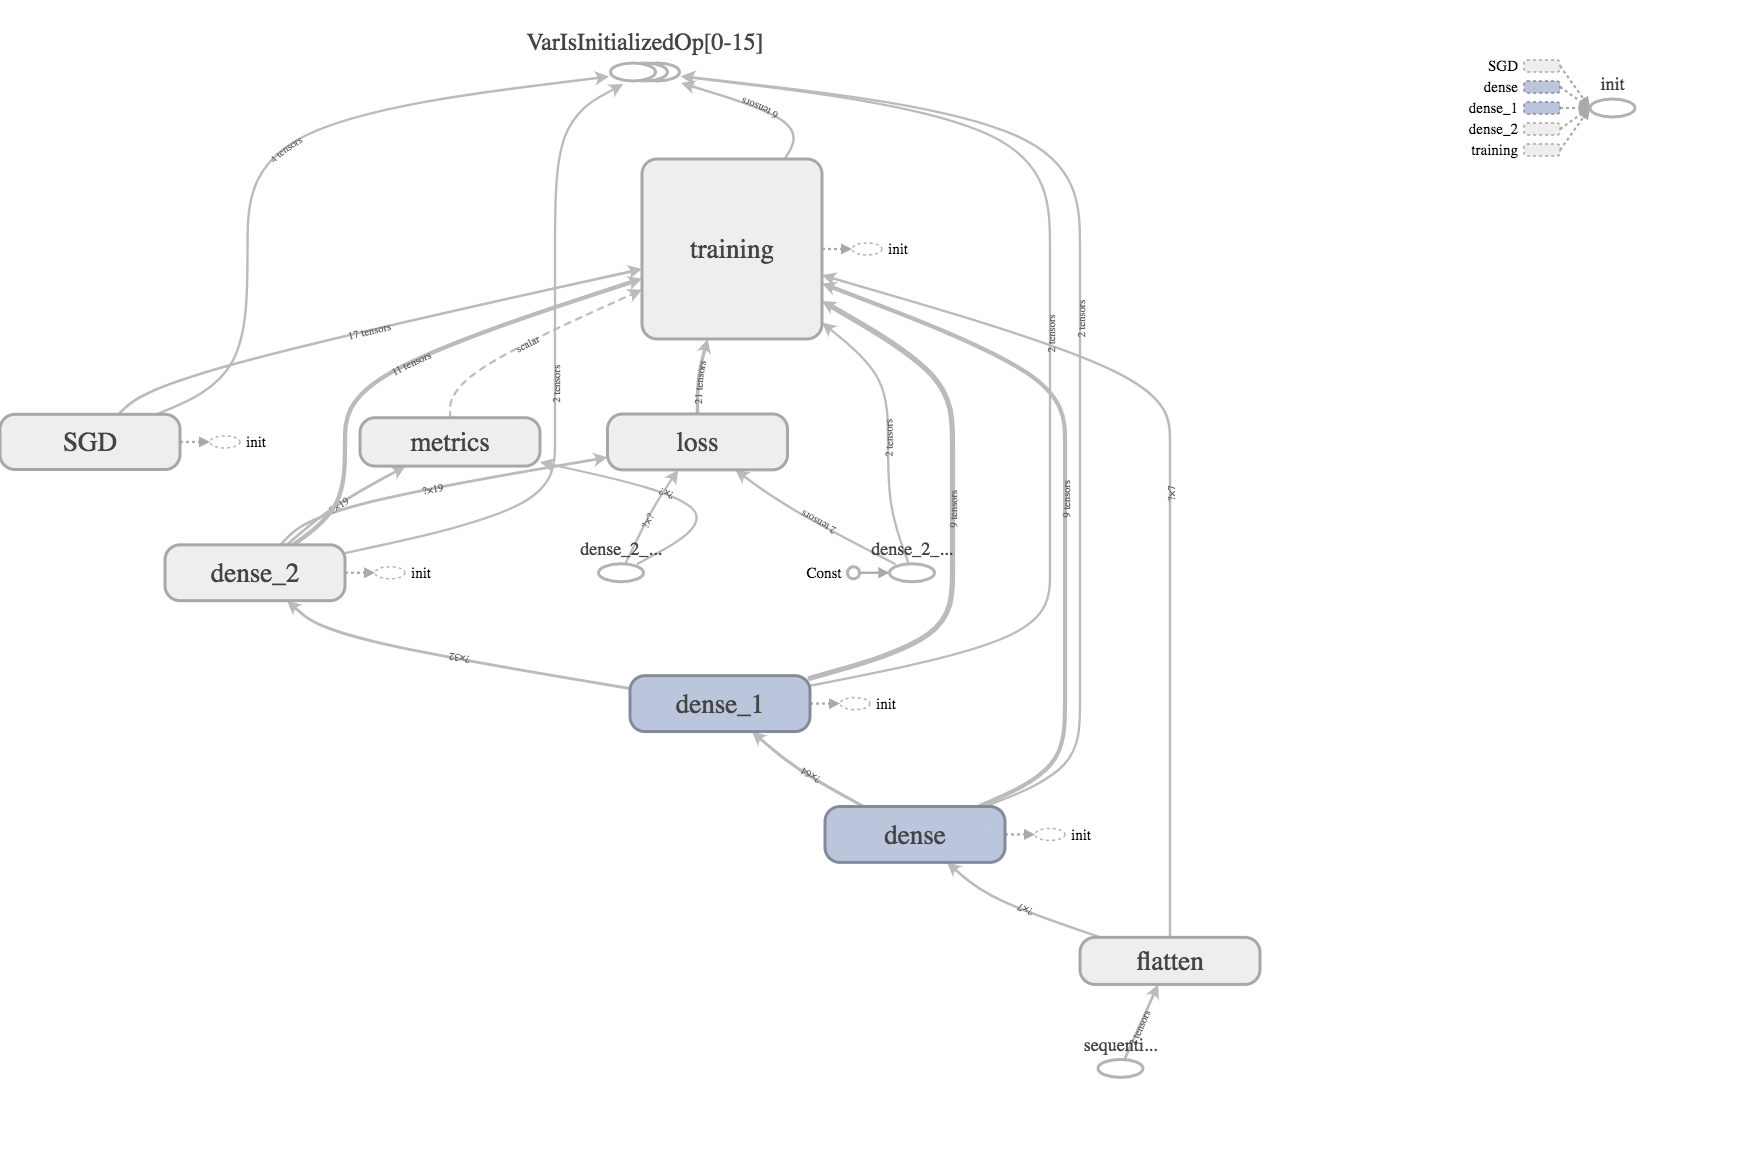

In [15]:
#Open Terminal in your working directory and type the command 'tensorboard --logdir ./Graph'
# open your web browser and enter the address 'htttp://localhost:6006'
from IPython.display import Image
Image("/Users/deepyuan/learngit/Graph/Blackfriday_tensorflow_graph.png")

In [16]:
y_pred = model.predict(X_test)
score = model.evaluate(X_test, y_test,verbose=1)
print(score)

53758/53758 [==============================] - 1s 15us/step
[0.8311350068333222, 0.7111127646228663]
